In [22]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #binary ise Bernolli veya Gauss kullanılır
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob , Word
from nltk.stem.snowball import SnowballStemmer

from langdetect import detect
%matplotlib inline

from nltk import word_tokenize

from wordcloud import WordCloud
from wordcloud import WordCloud , STOPWORDS


In [23]:
df = pd.read_csv("restaurant.csv")
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [25]:
%timeit df["text"] = df["text"].str.lower()



12.2 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
 df["text"] = df["text"].str.lower()

In [27]:
df["text"] = df["text"].str.replace("[^\w\s]" , "") #gereksiz karaktereleri kaldırır

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [28]:
df["text"] = df["text"].str.replace("\d+" , "") 

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [29]:
df["text"] = df["text"].str.replace("\n"," ").replace("\r" , "")

In [30]:
df.loc[df["stars"] < 3, "stat"] = "negative"
df.loc[df["stars"] > 3, "stat"] = "positive"
df.loc[df["stars"] == 3, "stat"] = "neutral"

df_v1 = df[["stars" , "stat" , "text"]]
df_v1.head()

,stars,stat,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stat', ylabel='count'>

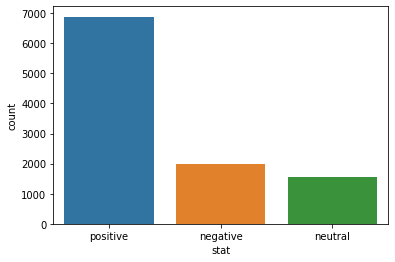

In [31]:
sns.countplot(df_v1["stat"])

In [32]:
df_v1["lang"] = df["text"].apply(detect)

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_v1["lang"].unique()

array(['en', 'zh-cn', 'de', 'sw', 'ko', 'ja', 'fr', 'da', 'es', 'pt',
       'sk'], dtype=object)

In [34]:
df_v1 = df_v1[df_v1["lang"]=="en"]

In [35]:
df_v1["lang"].unique()

array(['en'], dtype=object)

In [36]:
df_v1[["polarity" , "subjectivity"]] = df_v1["text"].apply(lambda x:pd.Series(TextBlob(x).sentiment))

In [37]:
df_v1["text"]

0        after getting food poisoning at the palms hote...
1        a feast worthy of gods  baccarnal buffet in ca...
2        the crab legs are better than the ones at wick...
3        not worth it too salty food and expensive this...
4        i would give this infinite stars if i could my...
                               ...                        
10412    best buffet ever irma was great served us bett...
10413    hollllllyyyy moleyyyy   this buffet was one fo...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets ive had in vegas my on...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10374, dtype: object

In [38]:
df_v1.head()

,stars,stat,text,lang,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en,0.219409,0.537292
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000


In [39]:
from PIL import Image

In [40]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   mask =mask,
                   max_words=25000,
                   stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Succesfully")
    path = "wc.png"
    display(Image.open(path))

In [41]:
text1 = df_v1[df_v1["stat"]=="positive"]

Word Cloud Saved Succesfully


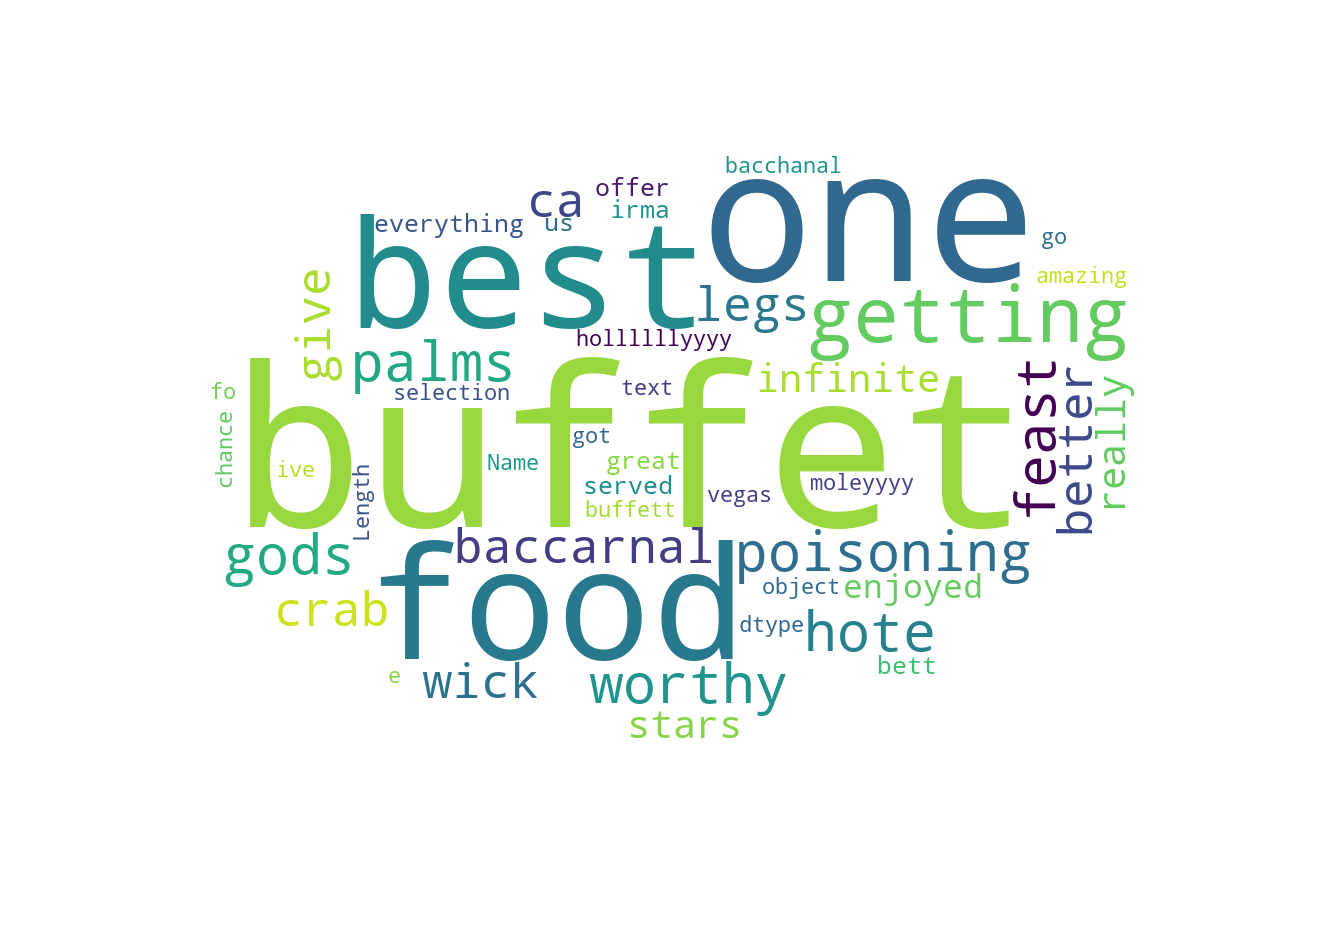

In [42]:
create_wordcloud(text1.text)

Word Cloud Saved Succesfully


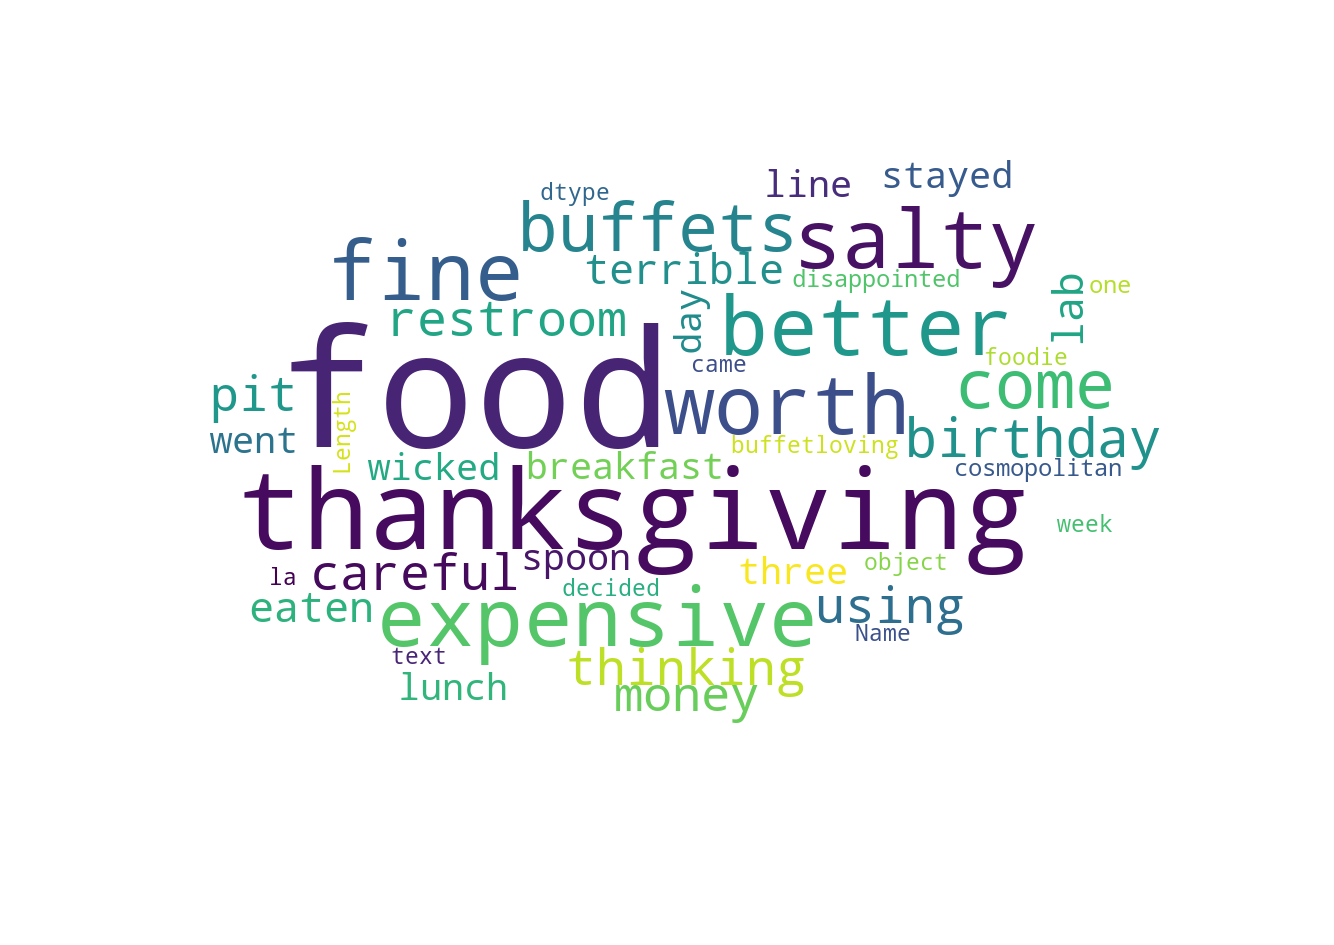

In [43]:
text2 = df_v1[df_v1["stat"]=="negative"]
create_wordcloud(text2.text)

Word Cloud Saved Succesfully


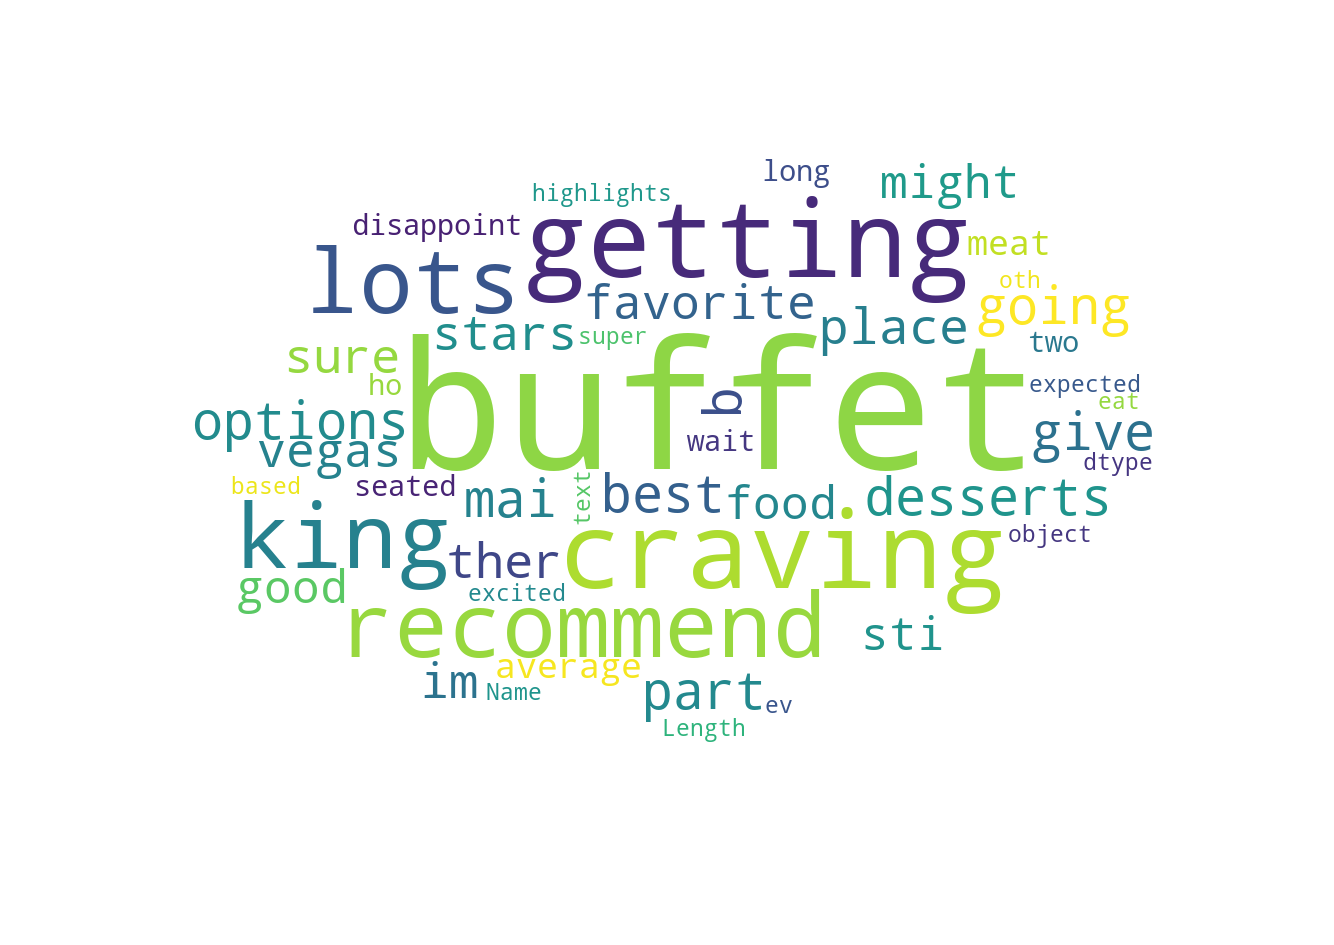

In [44]:
text3 = df_v1[df_v1["stat"]=="neutral"]
create_wordcloud(text3.text)

In [45]:
vect = TfidfVectorizer(stop_words = "english")
dtm = vect.fit_transform(df_v1.text)
features = vect.get_feature_names()
dtm.shape

(10374, 22389)

In [46]:
def summarize(df):

    #choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0,len(df))
        review_text = str(df.text[review_id])
        review_length = len(review_text)

    #create a dictionary of words and their TF-IDF scores
    word_scores ={}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id , features.index(word)]
    
    #print words with the top 5 TF-IDF scores
    print("Top Scoring Words: ")
    top_scores = sorted(word_scores.items() , key = lambda x:x[1] , reverse=True)[:5]
    for word , score in top_scores:
        print(word)

    print("\n" + review_text)

In [47]:
summarize(df_v1)

Top Scoring Words: 
loved
tortillas
going
asada
carne

review for the food  hit up salads first the mini individual sized plates were great tried the caesar salad which was perfectly sized and great paired with bread then i tried the feta watermelon salad it was so different i had never had something like that weird but crazy good as i walked by i saw honey comb dripping  so fresh never seen that before either awesome they said they have it flown in from canada  next i went for the asian side had to try the veggie rolls since im a huge fan they were so crunchy  fresh i could have gone back for nds  rds but i had to save room for everything else i hate duck but was willing to be open minded  try it it was mouthwatering literally melted in your mouth the fat was delectable orange chicken was unusual had never had it taste like that before but it was great tasting dont get me wrong it tasted like chicken fried steak to me  the sauce gave it this asian fusion yum dumpling  fried rice were 

 # Modelling 

In [48]:
x = df_v1.text
y = df_v1.stat

x.shape

(10374,)

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 42 , train_size = 0.24)

In [50]:
vect = CountVectorizer( stop_words = "english")


x_train_dtm = vect.fit_transform(x_train)
#learn the vocabulary dictionary ad create term document matrix 

print(x_train_dtm.shape)

x_test_dtm = vect.transform(x_test)

print(x_test_dtm.shape)


(2489, 10651)
(7885, 10651)


In [51]:
tf = pd.DataFrame(x_train_dtm.toarray() , columns = vect.get_feature_names())
tf.head()

,___,____,__________________________,____________________________,_really_,_that_,aa,aaaah,abating,abc,...,甜品也很多巧克力慕斯浓郁极了,皮蛋瘦肉粥,第一次去沒有傳說中那麼神奇,羊排一般太熟沒有水分而且不夠熱,蒙古牛肉,蝦餃,裡面地方很大從自己桌子出發去拿一盤東西再走回來已經佔用了他們所限定時間兩小時裡的相當一部分時間,这家的肉食很不错人多的时候要排队等拿有好多种烤肉和香肠供选择,過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不太容易因為放的太靠內距離太遠,魚香茄子
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
vect = CountVectorizer(ngram_range = (1,2)) #


x_train_dtm = vect.fit_transform(x_train)
x_train_dtm.shape


(2489, 122013)

In [53]:
df_v1["text"].apply(detect).value_counts()

en    10372
fr        1
ca        1
Name: text, dtype: int64

In [54]:
print(vect.get_feature_names()[-50:])# son 50 kelime

['zone they', 'zone what', 'zone you', 'zong', 'zong zi', '作為一個老吃客我姑且給他兩顆星作為鼓勵和安慰', '作為一個老吃客我姑且給他兩顆星作為鼓勵和安慰 as', '叉燒包', '叉燒包 congee', '叉燒肉', '叉燒肉 shumai', '如果你真希望嘗試滿足海鮮自助餐建議試一下位於加州傑克遜的農場自助餐禮拜五至禮拜一全天塊一個人龍蝦帝王蟹應有盡有', '如果你真希望嘗試滿足海鮮自助餐建議試一下位於加州傑克遜的農場自助餐禮拜五至禮拜一全天塊一個人龍蝦帝王蟹應有盡有 if', '排隊給我留下的印象最深', '排隊給我留下的印象最深 waiting', '有帝王蟹是橘黃的而不是最好的那種紅的', '有帝王蟹是橘黃的而不是最好的那種紅的 過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不太容易因為放的太靠內距離太遠', '杭州炒飯', '杭州炒飯 garlic', '椒鹽魚片', '椒鹽魚片 egg', '沒有帶子和石頭蟹鉗', '沒有帶子和石頭蟹鉗 no', '河粉一塌糊塗跟周圍的亞洲款菜式一樣只能滿足於這輩子沒吃過河粉的人', '河粉一塌糊塗跟周圍的亞洲款菜式一樣只能滿足於這輩子沒吃過河粉的人 pho', '炸春捲', '炸春捲 mongolian', '烤鴨', '烤鴨 bbq', '燒麥', '燒麥 hargow', '甜品也很多巧克力慕斯浓郁极了', '皮蛋瘦肉粥', '皮蛋瘦肉粥 everything', '第一次去沒有傳說中那麼神奇', '第一次去沒有傳說中那麼神奇 first', '羊排一般太熟沒有水分而且不夠熱', '羊排一般太熟沒有水分而且不夠熱 lamb', '蒙古牛肉', '蒙古牛肉 roasted', '蝦餃', '蝦餃 bbq', '裡面地方很大從自己桌子出發去拿一盤東西再走回來已經佔用了他們所限定時間兩小時裡的相當一部分時間', '裡面地方很大從自己桌子出發去拿一盤東西再走回來已經佔用了他們所限定時間兩小時裡的相當一部分時間 the', '这家的肉食很不错人多的时候要排队等拿有好多种烤肉和香肠供选择', '这家的肉食很不错人多的时候要排队等拿有好多种烤肉和香肠供选择 甜品也很多巧克力慕斯浓郁极了', '過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不

Hepsi ingilizce olmasına rağmen bazı japonca kelimeler silinmemmiş maalesef

# Predicting

In [55]:
vect = CountVectorizer()

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)



#Naive Bayes

nb = MultinomialNB()
nb.fit(x_train_dtm , y_train)
y_pred_class = nb.predict(x_test_dtm)

print(metrics.accuracy_score(y_test , y_pred_class))

0.7747622067216233


In [56]:

def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print("Features: " , x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm , y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print("Accuracy: " ,metrics.accuracy_score(y_test , y_pred_class))

In [57]:
vect = CountVectorizer(ngram_range = (1,2))
tokenize_test(vect)


Features:  122013
Accuracy:  0.7008243500317057


In [58]:
df_v2 = df_v1.copy()
df_v2["removal character"] = df_v1["text"].apply(lambda x: word_tokenize(x.lower()))
df_v2.head()

,stars,stat,text,lang,polarity,subjectivity,removal character
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702,"[after, getting, food, poisoning, at, the, pal..."
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en,0.219409,0.537292,"[a, feast, worthy, of, gods, baccarnal, buffet..."
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944,"[the, crab, legs, are, better, than, the, ones..."
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000,"[not, worth, it, too, salty, food, and, expens..."
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000,"[i, would, give, this, infinite, stars, if, i,..."


In [59]:
from textblob import Word
from nltk.corpus import stopwords

In [60]:
stop_words = list(stopwords.words("english"))
df_v2["stopwords remove"] = df_v2["removal character"].apply(lambda x : [word for word in x if word not in stop_words])
df_v2.head()

,stars,stat,text,lang,polarity,subjectivity,removal character,stopwords remove
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702,"[after, getting, food, poisoning, at, the, pal...","[getting, food, poisoning, palms, hotel, scare..."
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en,0.219409,0.537292,"[a, feast, worthy, of, gods, baccarnal, buffet...","[feast, worthy, gods, baccarnal, buffet, caesa..."
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944,"[the, crab, legs, are, better, than, the, ones...","[crab, legs, better, ones, wicked, spoon, huge..."
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000,"[not, worth, it, too, salty, food, and, expens...","[worth, salty, food, expensive, furst, kast, v..."
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000,"[i, would, give, this, infinite, stars, if, i,...","[would, give, infinite, stars, could, family, ..."


In [61]:
df_v2["stopwords remove"] = df_v2["stopwords remove"].apply(lambda x: " ".join(x))
df_v2.head(1)

,stars,stat,text,lang,polarity,subjectivity,removal character,stopwords remove
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702,"[after, getting, food, poisoning, at, the, pal...",getting food poisoning palms hotel scared eat ...


In [62]:
import nltk 
from nltk.stem import WordNetLemmatizer

In [63]:
df_v2["stopwords remove"] = df_v2["stopwords remove"].apply(lambda x:WordNetLemmatizer().lemmatize(x))

# Farklı bir model

In [64]:
x = df_v2["stopwords remove"]
y = df_v2["stat"]

df_v3 = df_v2[["stopwords remove" , "stat"]]

In [65]:
#import numpy as np
#from pycaret.classification import *

#exp_name = setup(data =df_v3 , target = "stat")

#best_model = compare_models()

In [66]:
df_v2.head()

,stars,stat,text,lang,polarity,subjectivity,removal character,stopwords remove
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702,"[after, getting, food, poisoning, at, the, pal...",getting food poisoning palms hotel scared eat ...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en,0.219409,0.537292,"[a, feast, worthy, of, gods, baccarnal, buffet...",feast worthy gods baccarnal buffet caesar pala...
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944,"[the, crab, legs, are, better, than, the, ones...",crab legs better ones wicked spoon huge prawns...
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000,"[not, worth, it, too, salty, food, and, expens...",worth salty food expensive furst kast visit bu...
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000,"[i, would, give, this, infinite, stars, if, i,...",would give infinite stars could family diamond...


In [67]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 42 )

In [68]:
vect = CountVectorizer(ngram_range = (1,2))
tokenize_test(vect)

Features:  292905
Accuracy:  0.712798766383963


In [69]:
vect = CountVectorizer()
tokenize_test(vect)

Features:  19513
Accuracy:  0.7910562837316885


__Üstteki koda göre__

n gram ile yapılan sonuç daha düşük geldi.

Bu algortima için n gramın 1 olması daha iyidir

In [70]:
vect = CountVectorizer(stop_words = "english")
tokenize_test(vect)

Features:  19334
Accuracy:  0.7833461835003855


In [71]:
vect = CountVectorizer( min_df=2)
tokenize_test(vect)

Features:  9456
Accuracy:  0.7952968388589051


In [72]:
vect = CountVectorizer(ngram_range = (1,2) ,  min_df=2)
tokenize_test(vect)

Features:  71046
Accuracy:  0.7956823438704703


In [73]:
vect = TfidfVectorizer(stop_words = "english")
dtm = vect.fit_transform(df_v2["stopwords remove"])
features = vect.get_feature_names()
dtm.shape

(10374, 22376)

In [74]:
def summarize(df , text):

    #choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0,len(df))
        review_text = str(df[text][review_id])
        review_length = len(review_text)

    #create a dictionary of words and their TF-IDF scores
    word_scores ={}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id , features.index(word)]
    
    #print words with the top 5 TF-IDF scores
    print("Top Scoring Words: ")
    top_scores = sorted(word_scores.items() , key = lambda x:x[1] , reverse=True)[:5]
    for word , score in top_scores:
        print(word)

    print("\n" + review_text)

In [75]:
summarize(df_v2,"stopwords remove")

Top Scoring Words: 
away
little
buffets
food
read

read reviews bacchanal see everything rating may wonder let try explain people expectation everything must absolutely perfect isnt find things bring rating others dont much compare think best give whole bunch rest us right middle us may lots buffets brunches like really know talking bacchanal one best las vegas high end buffet perfect say high end buffet compare others approximately price range dont compare something like circus circus different category dined sunday around wait min long prime times terminals front tell approximately long wait enter cell number time reservation called able get way wander around gamble casino instead standing line nice feature room nice spread dont feel crowded together food areas part also spread one exception complaint many buffets carving station placed right middle line food means lines people form block items food hard get especially dont want anything carving station sometimes true omelet station 

In [76]:
summarize(df_v2,"text")

Top Scoring Words: 
family
group
friends
buffet
favorite

my favorite buffet of alltime  food great selection good quality the menu changes from time to time but to give you an idea heres what ive had pork chops prime rib crab served steamed or cold oysters shrimp dim sum sushi bone marrow pho congee maccheese fried rice watermelon salad macarons gelato if you are not looking for an unconventional menu with crazy unique dishes bacchanal will definitely do the job for you it is what you would expect out of a buffet and more  environment lots of seating lots of room high ceilings moderately dim lighting clean basically you will feel comfortable at your table and get to enjoy conversation with your group nothing to worry about here you can have a nice date get rowdy with friends or spend time with family one thing to note is that the restroom is located right outside the restaurant but walking outside and coming back in is not really a hassle  verdict vegas buffets ive tried aria wynn wic